In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from config import g_key
import gmaps
import os

In [2]:
# Requesting confirmed planets url for facility list
confirmed_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
facility = pd.read_csv(confirmed_url)
facility_df = facility[['pl_name','pl_facility','st_dist']]

In [3]:
df = pd.read_csv("facility_data_locations.csv")
df

,pl_facility,Lat,Long,Country
0,HATNet,36.601309,36.164228,Turkey
1,Kepler,28.282865,76.950927,India
2,Haute-Provence Observatory,43.934786,5.710468,France
3,W. M. Keck Observatory,19.826183,-155.474661,United States
4,Okayama Astrophysical Observatory,34.576269,133.594117,Japan
...,...,...,...,...
56,Atacama Large Millimeter Array (ALMA),-23.023168,-67.753780,Chile
57,Winer Observatory,31.665895,-110.601725,United States
58,Haleakala Observatory,20.708474,-156.256690,United States
59,KOINet,-34.580319,19.351710,South Africa


In [4]:
merged_facility_df = pd.merge(facility_df,df, on="pl_facility")
merged_facility_clean = df = merged_facility_df.dropna(how='any')
merged_facility_clean

,pl_name,pl_facility,st_dist,Lat,Long,Country
0,HAT-P-19 b,HATNet,215.00,36.601309,36.164228,Turkey
1,HAT-P-20 b,HATNet,70.00,36.601309,36.164228,Turkey
2,HAT-P-21 b,HATNet,279.48,36.601309,36.164228,Turkey
3,HAT-P-22 b,HATNet,81.96,36.601309,36.164228,Turkey
4,HAT-P-23 b,HATNet,368.61,36.601309,36.164228,Turkey
...,...,...,...,...,...,...
4325,HD 97048 b,Atacama Large Millimeter Array (ALMA),185.00,-23.023168,-67.753780,Chile
4326,NY Vir c,Winer Observatory,551.99,31.665895,-110.601725,United States
4327,Wendelstein-1 b,Haleakala Observatory,307.98,20.708474,-156.256690,United States
4328,Wendelstein-2 b,Haleakala Observatory,574.40,20.708474,-156.256690,United States


In [5]:
merged_facility_count = merged_facility_clean.groupby('pl_facility')['pl_name'].count()
merged_facility_lat = merged_facility_clean.groupby('pl_facility')['Lat'].mean()
merged_facility_long = merged_facility_clean.groupby('pl_facility')['Long'].mean()
group_df = pd.DataFrame({"Planet Count": merged_facility_count, "Lat": merged_facility_lat, "Long": merged_facility_long})
group_df

,Planet Count,Lat,Long
pl_facility,,,
Anglo-Australian Telescope,37,31.675295,-110.952129
Arecibo Observatory,3,18.346504,-66.752873
Atacama Large Millimeter Array (ALMA),1,-23.023168,-67.753780
Bohyunsan Optical Astronomical Observatory,17,36.164908,128.977035
Calar Alto Observatory,11,37.220936,-2.546736
Cerro Tololo Inter-American Observatory,2,-30.168746,-70.806311
European Southern Observatory,2,48.259719,11.670955
Fred Lawrence Whipple Observatory,6,31.675240,-110.951947
Gemini Observatory,9,19.824071,-155.468840


In [6]:
# Calling API key
gmaps.configure(api_key=g_key)

# Setting location and count
locations = group_df[["Lat", "Long"]]
weights = group_df["Planet Count"]

# Configuring map layout
figure_layout = {
    'width': "100%",
    'height': '400px',
    'padding': '1px',
}

fig = gmaps.figure(layout=figure_layout, center=(21, 4), zoom_level=2.0)
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights, dissipating=False)
fig.add_layer(heatmap_layer)

# Setting heatmap intensity and radius
heatmap_layer.max_intensity = 50
heatmap_layer.point_radius = 4

# Displaying heatmap
fig

Figure(layout=FigureLayout(height='400px', padding='1px', width='100%'))

In [7]:
top_five_facilities = group_df[group_df['Planet Count'] > 97]
top_five_facilities.reset_index()

,pl_facility,Planet Count,Lat,Long
0,Kepler,2391,28.282865,76.950927
1,La Silla Observatory,245,-29.255998,-70.738035
2,SuperWASP,113,36.001643,-78.938186
3,Transiting Exoplanet Survey Satellite (TESS),98,38.995042,-76.852344
4,W. M. Keck Observatory,175,19.826183,-155.474661


Text(0.5, 1.0, 'Top Five Observatories By Number of Exoplanets Discovered')

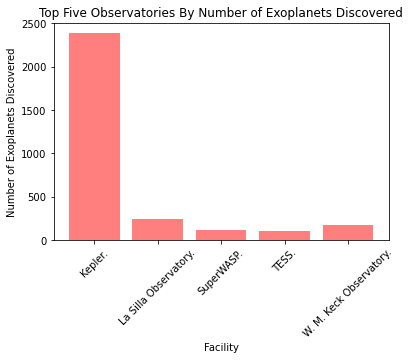

In [22]:
Planet_Count = top_five_facilities['Planet Count']
x_axis = np.arange(len(Planet_Count))

plt.bar(x_axis,Planet_Count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Kepler.", "La Silla Observatory.", "SuperWASP.", "TESS.", "W. M. Keck Observatory."], size = 10, rotation=45)

plt.xlabel("Facility")
plt.ylabel("Number of Exoplanets Discovered")
plt.title("Top Five Observatories By Number of Exoplanets Discovered")

In [10]:
merged_country_count = merged_facility_clean.groupby('Country')['pl_name'].count()
country_df = pd.DataFrame({"Planet Count": merged_country_count})
country_df

,Planet Count
Country,
Argentina,1
Australia,2
Chile,322
China,5
England,2
France,51
Germany,10
India,2391
Japan,23


In [11]:
top_five_countries = country_df[country_df['Planet Count'] > 50]
top_five_countries

,Planet Count
Country,
Chile,322
France,51
India,2391
Turkey,60
United States,531


Text(0.5, 1.0, 'Top Five Countries By Number of Exoplanets Discovered')

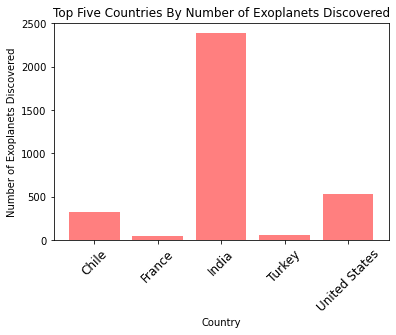

In [21]:
Planet_Count = top_five_countries['Planet Count']
x_axis = np.arange(len(Planet_Count))

plt.bar(x_axis,Planet_Count, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Chile", "France", "India", "Turkey", "United States"], size = 12,rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Exoplanets Discovered")
plt.title("Top Five Countries By Number of Exoplanets Discovered")